# Risk Theory Midterm 3

Use a programing language to code {${ C_{t}: t = 0,1,...}$} defined by 

$$C_{t} = C_{0} + t \sum \pi_{j}-\sum_{k=1}^{t}S_{k} \label{Risk_Process}$$

where $S_{1}, S_{2},...$ are iid random variables distributed as 

$$S = Y_{1}+...+S_{N}\label{Severity}$$

where $N\sim $Negative Binomial such that $ E(N)=120$ and $V(N) = 13^{2}$, and where $Y_{1},Y_{2},...$ are iid as $Y \sim $LogNormal such that $M(Y) = 45$ and $VaR_{0.995}(Y) = 3500$, and independent of $N$. For the distirbution
of S use bayesian credibility, fitting to log(S) as prior distribution a Student$(\mu_0, n_0\alpha(n_0 + 1)^{-1}β^{−1}, 2\alpha)$ calibrating it's hyperparameters through simulations of \ref{Severity} and then obtaining its posterior distribution considering own experience which consists in 5 observations of $S$ as follows: 

$$\{4917, 32666, 12813, 17664, 23994\}\label{Obs}$$

Consider that the return rate to be paid to the shareholders of the insurance company is 12% per period, that the average low risk return rate on investments available to the company is 5% and that the initial capital $C_{0}$ has to be such that the probability of solvency in a 1-year horizon is 99.5%. Using as total severity for time horizons of 1, 5 and 10 years, respectively, according to the risk process $C_{t}$

## By Berricrack

## Libraries

In [1]:
#Data management
import pandas as pd
import numpy as np

#Statistical and math 
import scipy.stats  as stats
import math as mt

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns

#Macro for printing the plots
%matplotlib inline

#We set the seed
np.random.seed(42)

## Parameters of the frecuency r.v.

$N \sim$ Negative Binomial such that $ E(N)=120$ and $V(N) = 13^{2}$

In [2]:
E_N, V_N = 120, 169

We have the values for the expected value and the variance of the Negative Binomial random variable, so we use them to find the parameters of this distribution with a simple system of equiations as follows: $$120 = \frac{r(1-p)}{p}$$ $$169 = \frac{r(1-p)}{p^2}$$

Therefore the parameters of the Negative Binomial are:

In [3]:
r, p  = 14400/49, 120/169

Now we get the expected value and the variance of a Negative Binomial with the parameters we got to verify:

In [4]:
print(stats.nbinom.mean(mt.ceil(r),p))
print(stats.nbinom.var(mt.ceil(r),p))

120.05000000000003
169.07041666666672


## Parameters of the severity r.v.

We have that $Y_{1},Y_{2},...$ are iid as $Y \sim $LogNormal such that $M(Y) = 45$ and $VaR_{0.995}(Y) = 3500$, so we want to determinate the parameters of a LogNormal given 2 quantiles of this distribution. So we found a method to do this in a very simple way: 

Let be X a LogNormal random variable from a two-parameter family. Then given probabilities
p1 and p2 such that $P(X < log(x_1)) = p_1$ and $P(X < log(x_2)) = p_2$ we will have that our parameters are: 

$$\sigma = \frac{log(x_2)-log(x_1)}{\Phi^{-1}(p_2)-\Phi^{-1}(p_1)}\label{sigma}$$ and 
$$\mu = \frac{log(x_1) \Phi^{-1}(p_2)-log(x_2) \Phi^{-1}(p_1)}{\Phi^{-1}(p_2)-\Phi^{-1}(p_1)}\label{mu}$$

In this case we have that $p_1 = 0.5$, $p_2 = 0.995$, $x_1 = Median(S)$ and $x_2 = VaR_0.995(S)$.

\vspace{1cm}
PDF: https://www.johndcook.com/quantiles_parameters.pdf

In [5]:
M_S, VaR_995_S = 45, 3500

Applying \ref{sigma} and \ref{mu} we find the parameters for the Severity random variable:

In [6]:
Phi_m = stats.norm.ppf(0.5, loc=0, scale=1)
Phi_v = stats.norm.ppf(0.995, loc=0, scale=1)

sigma_S = (mt.log(VaR_995_S)-mt.log(M_S))/(Phi_v-Phi_m)
mu_S = ((mt.log(M_S)*Phi_v)-(mt.log(VaR_995_S)*Phi_m))/(Phi_v-Phi_m)

print(sigma_S, mu_S)

1.6902734011561145 3.8066624897703196


Now we get the Median and the VaR of a LogNormal with the parameters we got to verify:

In [7]:
print(stats.lognorm.ppf(0.5, scale = mt.exp(mu_S), s=sigma_S))
print(stats.lognorm.ppf(0.995,scale = mt.exp(mu_S), s=sigma_S))

44.99999999999999
3499.999999999999


## Collective Risk Model Simulations

We define our number of simulations and two empty arrays for saving the simulated values:

In [8]:
m = 1000000
ni, si = [], []

### Simulations for frequency

In [9]:
ni = list(map(lambda x: x,stats.nbinom.rvs(mt.ceil(r),p,size = m)))

In [10]:
ni

[127,
 122,
 105,
 121,
 109,
 111,
 104,
 114,
 116,
 125,
 138,
 90,
 111,
 111,
 111,
 124,
 118,
 112,
 125,
 139,
 117,
 125,
 127,
 115,
 115,
 116,
 131,
 107,
 112,
 110,
 107,
 137,
 111,
 103,
 131,
 105,
 111,
 123,
 129,
 129,
 113,
 137,
 131,
 105,
 123,
 117,
 129,
 115,
 124,
 125,
 120,
 112,
 108,
 130,
 114,
 127,
 128,
 124,
 121,
 127,
 140,
 118,
 110,
 89,
 129,
 122,
 111,
 128,
 119,
 124,
 113,
 128,
 113,
 116,
 121,
 126,
 124,
 112,
 132,
 97,
 116,
 127,
 137,
 108,
 122,
 119,
 127,
 128,
 107,
 142,
 109,
 146,
 121,
 109,
 106,
 96,
 112,
 117,
 139,
 106,
 125,
 107,
 123,
 124,
 153,
 113,
 109,
 122,
 134,
 136,
 115,
 129,
 122,
 129,
 116,
 123,
 132,
 116,
 122,
 112,
 125,
 108,
 157,
 110,
 117,
 100,
 117,
 119,
 99,
 104,
 145,
 98,
 114,
 129,
 123,
 118,
 110,
 104,
 132,
 129,
 108,
 122,
 108,
 98,
 118,
 131,
 125,
 122,
 106,
 101,
 95,
 106,
 129,
 107,
 111,
 118,
 110,
 122,
 138,
 116,
 137,
 150,
 120,
 145,
 125,
 109,
 105,
 120,


### Simulations 

In [11]:
for i in range(len(ni)):  
    if ni[i] > 0:
        y = np.array(list(map(lambda n: n,stats.lognorm.rvs(scale = mt.exp(mu_S), 
                                                            s=sigma_S, size = ni[i]))))
        si.append(y.sum())
    else:
        si.append(0)
Simulations = np.array(si)

### Important values for the simulations

In [12]:
mean = Simulations.mean()
t_mean = stats.lognorm.mean(scale = mt.exp(mu_S), s=sigma_S)*np.mean(ni)
variance = Simulations.std()**2
median = np.percentile(Simulations, 50)
VaR = np.percentile(Simulations, 99.5)

We see if the simulated values mean and the theoretical mean ( $E(S)*E(N)$ ) match:

In [13]:
print('The mean for S is:',mean)
print('The theoretical mean for S is:',t_mean)

The mean for S is: 22532.650860675698
The theoretical mean for S is: 22540.817505442505


In [14]:
print('The variance for S is:',variance)
print('The median for S is:',median)
print('The VaR of level 0.995 for S is:',VaR)

The variance for S is: 73390085.64211449
The median for S is: 20974.676808570555
The VaR of level 0.995 for S is: 59948.413901684624


## Prior Distribution

As we want to fit $log(S)$ to a Student Distribution with parameters $\mu_0, n_0\alpha(n_0 + 1)^{-1}β^{−1}, 2\alpha$ we first apply log to the simulated values.

In [15]:
log_Simulations = np.log(Simulations)

After having $log(S)$ we look for the hyperparameters for the prior Student distribution, we make this with the function t.fit, where we pass the 100 percentiles of the logSimulations to fit a Student distribution, also we fixed the mean of the logSimulations as the location hyperparameter with floc.

In [16]:
y = list(map(lambda x: np.percentile(log_Simulations, x) , list(range(1,101))))
prior_alpha, prior_mu, prior_sigma  = stats.t.fit(y,floc=log_Simulations.mean())
print(prior_alpha, prior_mu, prior_sigma)

3.809678600904286 9.9678844137989 0.25609907828237555


Therefore we have that: 

\begin{itemize}
\item $\mu_0 = 9.9679$
\item $n_0\alpha(n_0 + 1)^{-1}β^{−1} = 0.2561$
\item $2\alpha = 3.8097$
\end{itemize}

Then with this parameters we calculate the mean, the median, the $VaR_{75}$ and the $VaR_{99.5}$ to compare these values with the ones of the simulated values:

In [17]:
names = ['Mean', 'Median', 'VaR_75', 'VaR_99.5']
sim = [np.mean(log_Simulations), np.percentile(log_Simulations, 50), 
       np.percentile(log_Simulations, 75), np.percentile(log_Simulations, 99.5)]
fit = stats.t.ppf([0.5, 0.5, 0.75, 0.995], df=prior_alpha, loc=prior_mu, scale=prior_sigma)

Compared = pd.DataFrame([names, sim, fit]).T
Compared.columns = ['Measure', 'Simulations', 'Fitted_Student']
Compared.rename(index=Compared.Measure, inplace=True)
del Compared['Measure']
Compared

,Simulations,Fitted_Student
Mean,9.96788,9.96788
Median,9.95107,9.96788
VaR_75,10.1607,10.1585
VaR_99.5,11.0012,11.1882


As we can see, the values we get from the fitted Student distribution are quite similar, anyway we can also plot the logSimulated values and the density of the Student to verify: 

<Figure size 864x864 with 0 Axes>

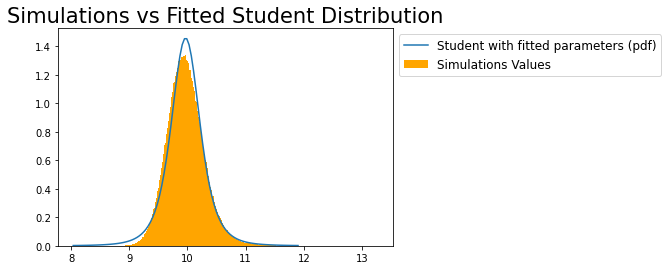

In [18]:
plt.figure(figsize=(12,12))

fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.t.ppf(0.001,df=prior_alpha,loc=prior_mu,scale=prior_sigma),
                stats.t.ppf(0.999,df=prior_alpha,loc=prior_mu,scale=prior_sigma), 100)
rv = stats.t(df=prior_alpha,loc=prior_mu,scale=prior_sigma)

ax.plot(x, rv.pdf(x), label='Student with fitted parameters (pdf)')
ax.hist(log_Simulations, bins=500, density=True, color='orange', label='Simulations Values')

plt.title('Simulations vs Fitted Student Distribution')
y = plt.gca().title
y.set_fontsize(21)
y.set_color('black')

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.5,fontsize='large')

plt.show()

## Posterior Distribution

Now that we have the prior parameters, we can work with those parameters and with the experience of the company for calibrate the posterior parameters.

In [19]:
EXP = pd.DataFrame({'Experience':[4917, 32666, 12813, 17664, 23994]})
EXP['Log_Experience'] = np.log(EXP['Experience'])
EXP

,Experience,Log_Experience
0,4917,8.500454
1,32666,10.394090
2,12813,9.458216
3,17664,9.779284
4,23994,10.085559


We know that the prior parameters are:

begin{itemize}
\item $\mu_0 = 9.9679$
\item $n_0\alpha(n_0 + 1)^{-1}β^{−1} = 0.2561$
\item $2\alpha = 3.8097$
\end{itemize}

We also know that the posterior distribution has the parameters:


$\mu_m$
$(n_0+n)(\alpha+\frac{n}{2})(n_0 + n + 1)^{-1}β^{−1}_n$
$2\alpha + n$


Where $n = 5$ and 

$$\mu_m = \frac{n_0\mu_0 + n\bar{s}}{n_0+n}\label{mun}$$

As we have $n_0\alpha(n_0 + 1)^{-1}β^{−1} = 0.2561$, we can get different values for $n_0$ and $\beta$, we'll have to calibrate these values to find the best posterior distribution. 

We start from the fact that $n_0\alpha(n_0 + 1)^{-1}β^{−1} = prior\_sigma$, and from here notice that we can write $n_0$ in terms of $\beta$ as follows:

$$n_0 = \frac{y\beta}{1-y\beta}$$

where y is:

In [20]:
y = (2*prior_sigma)/prior_alpha

From here we notice that we can give a value to $\beta$ and we will get our $n_0$, $n_0$ modifies a little the value of $\mu_n$, so we'll play with the value of $\beta$ to see what happens to the posterior distribution. Also we realize that for getting both values $n_0$ and $\beta$ greater than 0 the value of $\beta$ limitates from 0 to $\frac{1}{y}$.

In [21]:
1/y

7.437899867612416

In [22]:
#Function to get n_0 from a given beta.
def n_0(be):
    return (y*be)/(1-(y*be))

#Function to confirm tha value of the prior_sigma with the beta we choose. 
def prior_sigma_f(n0,be):
    return (n0*prior_alpha)/(2*be*(n0+1))

We select the value of $\beta$:

In [23]:
beta = 4.2

We verify that we get the same value for prior_sigma from beta:

In [24]:
print(prior_sigma), print(prior_sigma_f(n_0(beta),beta))

0.25609907828237555
0.25609907828237555


(None, None)

Now we calculate $\mu_n$ with formula number \ref{mun}, where $\bar{s}$ is the mean of the observed own experience (\ref{Obs}). Also we calculate the posterior_alpha.

In [25]:
def mu_m(n0):
    return ((n0*prior_mu)+(5*np.mean(EXP['Log_Experience'])))/(n0+5)

posterior_alpha = prior_alpha + 5
posterior_mu = mu_m(n_0(beta))
print(posterior_alpha, posterior_mu)

8.809678600904286 9.710335700457867


We observe that the mean of the experience is smaller than the prior_mu.

In [26]:
print(np.mean(EXP['Log_Experience'])) 
print(prior_mu)

9.643520502937259
9.9678844137989


Therefore we have to give $\beta$ a value such that the posterior_mu is smaller than  the prior_mu.

In [27]:
posterior_mu, prior_mu

(9.710335700457867, 9.9678844137989)

Now that we get posterior_mu and posterior_alpha, we have to fit the logSimulations to the posterior Student distribution with fixed alpha and mu parameters as follows to get posterior_sigma:

In [28]:
observed = list(map(lambda x: np.percentile(log_Simulations, x) , list(range(1,101))))
posterior_alpha, posterior_mu, posterior_sigma = stats.t.fit(observed, fdf=posterior_alpha, floc=posterior_mu)
print(posterior_alpha, posterior_mu, posterior_sigma)

8.809678600904286 9.710335700457867 0.37841796874999944


Now that we also have the posterior hyperparameters we put them together with the prior hyperparameters for a comparison:

In [29]:
Params = pd.DataFrame([['Alpha', 'Mu', 'Sigma'], 
                         [prior_alpha, prior_mu, prior_sigma], 
                         [posterior_alpha, posterior_mu, posterior_sigma]]).T
Params.columns = ['Parameter', 'Prior', 'Posterior']
Params.rename(index=Params.Parameter, inplace=True)
del Params['Parameter']
Params

,Prior,Posterior
Alpha,3.80968,8.80968
Mu,9.96788,9.71034
Sigma,0.256099,0.378418


Also we plot both densities to see how much they differ.

<Figure size 864x864 with 0 Axes>

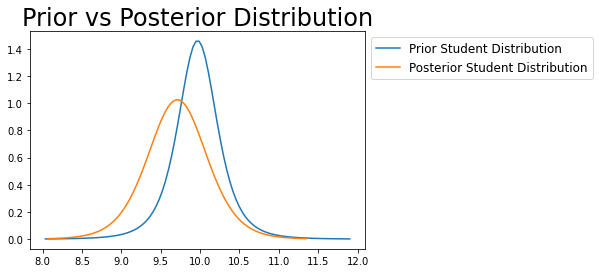

In [30]:
plt.figure(figsize=(12,12))

fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.t.ppf(0.001,df=prior_alpha,loc=prior_mu,scale=prior_sigma),
                stats.t.ppf(0.999,df=prior_alpha,loc=prior_mu,scale=prior_sigma), 100)
rv = stats.t(df=prior_alpha,loc=prior_mu,scale=prior_sigma)

ax.plot(x, rv.pdf(x), label='Prior Student Distribution')

y = np.linspace(stats.t.ppf(0.001,df=posterior_alpha,loc=posterior_mu,scale=posterior_sigma),
                stats.t.ppf(0.999,df=posterior_alpha,loc=posterior_mu,scale=posterior_sigma), 100)
rv2 = stats.t(df=posterior_alpha,loc=posterior_mu,scale=posterior_sigma)

ax.plot(y, rv2.pdf(y), label='Posterior Student Distribution')


plt.title('Prior vs Posterior Distribution')
y = plt.gca().title
y.set_fontsize(24)
y.set_color('black')

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.5,fontsize='large')

plt.show()

## Risk Process

Now that we have the posterior distribution, we can proceed to code the risk process \ref{Risk_Process}. We have that the return rate to be paid to the shareholders is 12%, the low risk return rate on investments is 5% and that the initial capital $C_{0}$ has to be such that the probability of solvency in a 1-year horizon is 99.5%.

In [31]:
r, rf = 0.12, 0.05
sev_time = [1, 5, 10]

In [32]:
posterior_alpha, posterior_mu, posterior_sigma

(8.809678600904286, 9.710335700457867, 0.37841796874999944)

In [33]:
post_mean = stats.t.mean(df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma)
post_median = stats.t.ppf(0.5,df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma)
post_VaR = stats.t.ppf(0.995,df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma)
post_SCR = post_VaR - post_median
print(post_median, post_VaR, post_SCR)

9.710335700457867 10.946886767696329 1.2365510672384623


In [34]:
from math import exp

In [35]:
berri_VaR = exp(post_VaR)

In [36]:
berri_med=exp(post_median)

In [37]:
berri_med

16487.13568686504

In [38]:
berri_VaR

56777.009911599846

In [39]:
berri_SCR = berri_VaR - berri_med

In [40]:
berri_SCR

40289.874224734805

In [41]:
p = berri_med + (r - rf) * berri_SCR
p

19307.426882596475

In [42]:
C0 = post_VaR
C0

10.946886767696329

In [43]:
post_VaR

10.946886767696329

In [44]:
post_SCR

1.2365510672384623

In [45]:
p

19307.426882596475

In [46]:
from math import exp

In [47]:
berri_VaR

56777.009911599846

In [57]:
berri_med

16487.13568686504

In [59]:
berri_VaR

56777.009911599846

In [78]:
berri_SCR

40289.874224734805

In [80]:
c0 = (1-(r-rf))*berri_SCR

In [81]:
c0

37469.58302900337

In [50]:
p 

19307.426882596475

In [51]:
rf 

0.05

In [84]:
 prueba = (np.exp(stats.t.rvs(df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma,size = 1000000))).tolist()

In [52]:
Sim_S = pd.DataFrame({"Año 1":(np.exp(stats.t.rvs(df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma,size = 1000000))).tolist()})

In [53]:
Sim_S["Año 2"] = (np.exp(stats.t.rvs(df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma,size = 1000000))).tolist()

In [54]:
Sim_S["Año 3"] = (np.exp(stats.t.rvs(df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma,size = 1000000))).tolist()

In [55]:
Sim_S["Año 4"] = (np.exp(stats.t.rvs(df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma,size = 1000000))).tolist()

In [56]:
Sim_S["Año 5"] = (np.exp(stats.t.rvs(df=posterior_alpha, loc=posterior_mu, scale=posterior_sigma,size = 1000000))).tolist()

In [57]:
Sim_S

,Año 1,Año 2,Año 3,Año 4,Año 5
0,15038.186456,5809.476196,27928.673925,12165.240774,19404.465497
1,13843.763668,24048.711297,15381.777782,11782.432754,26584.885222
2,11642.963712,13679.091598,12013.380628,27213.495971,10637.729589
3,41296.157277,26862.862820,14713.426142,5369.769558,29826.470498
4,16396.305241,15395.728088,7775.321811,24055.674712,20502.909616
...,...,...,...,...,...
999995,11638.900482,23868.306401,23775.888925,28354.541067,9539.856757
999996,16053.090946,61885.611196,34963.804045,20980.417757,21785.233004
999997,17684.606887,20049.002997,19242.800155,10487.529034,23386.969791
999998,7931.037391,17073.570663,22223.855035,18935.791700,10396.583514


In [58]:
Sum_S = Sim_S.cumsum(axis=0)

In [59]:
Sum_S

,Año 1,Año 2,Año 3,Año 4,Año 5
0,1.503819e+04,5.809476e+03,2.792867e+04,1.216524e+04,1.940447e+04
1,2.888195e+04,2.985819e+04,4.331045e+04,2.394767e+04,4.598935e+04
2,4.052491e+04,4.353728e+04,5.532383e+04,5.116117e+04,5.662708e+04
3,8.182107e+04,7.040014e+04,7.003726e+04,5.653094e+04,8.645355e+04
4,9.821738e+04,8.579587e+04,7.781258e+04,8.058661e+04,1.069565e+05
...,...,...,...,...,...
999995,1.812364e+10,1.812102e+10,1.810298e+10,1.812049e+10,1.812432e+10
999996,1.812366e+10,1.812108e+10,1.810301e+10,1.812051e+10,1.812434e+10
999997,1.812367e+10,1.812110e+10,1.810303e+10,1.812052e+10,1.812437e+10
999998,1.812368e+10,1.812112e+10,1.810306e+10,1.812054e+10,1.812438e+10


In [60]:
Sum_S

,Año 1,Año 2,Año 3,Año 4,Año 5
0,1.503819e+04,5.809476e+03,2.792867e+04,1.216524e+04,1.940447e+04
1,2.888195e+04,2.985819e+04,4.331045e+04,2.394767e+04,4.598935e+04
2,4.052491e+04,4.353728e+04,5.532383e+04,5.116117e+04,5.662708e+04
3,8.182107e+04,7.040014e+04,7.003726e+04,5.653094e+04,8.645355e+04
4,9.821738e+04,8.579587e+04,7.781258e+04,8.058661e+04,1.069565e+05
...,...,...,...,...,...
999995,1.812364e+10,1.812102e+10,1.810298e+10,1.812049e+10,1.812432e+10
999996,1.812366e+10,1.812108e+10,1.810301e+10,1.812051e+10,1.812434e+10
999997,1.812367e+10,1.812110e+10,1.810303e+10,1.812052e+10,1.812437e+10
999998,1.812368e+10,1.812112e+10,1.810306e+10,1.812054e+10,1.812438e+10


In [61]:
time = np.array([1,2,3,4,5])*p

In [62]:
time 

array([19307.4268826 , 38614.85376519, 57922.28064779, 77229.70753039,
       96537.13441298])

In [82]:
c0 = [c0] * 1000000

In [ ]:
proceso = 

In [90]:
Sum_S

,Año 1,Año 2,Año 3,Año 4,Año 5
0,1.503819e+04,5.809476e+03,2.792867e+04,1.216524e+04,1.940447e+04
1,2.888195e+04,2.985819e+04,4.331045e+04,2.394767e+04,4.598935e+04
2,4.052491e+04,4.353728e+04,5.532383e+04,5.116117e+04,5.662708e+04
3,8.182107e+04,7.040014e+04,7.003726e+04,5.653094e+04,8.645355e+04
4,9.821738e+04,8.579587e+04,7.781258e+04,8.058661e+04,1.069565e+05
...,...,...,...,...,...
999995,1.812364e+10,1.812102e+10,1.810298e+10,1.812049e+10,1.812432e+10
999996,1.812366e+10,1.812108e+10,1.810301e+10,1.812051e+10,1.812434e+10
999997,1.812367e+10,1.812110e+10,1.810303e+10,1.812052e+10,1.812437e+10
999998,1.812368e+10,1.812112e+10,1.810306e+10,1.812054e+10,1.812438e+10


In [91]:
pi_t 

,Monto de primas en t
0,19307.426883
1,38614.853765
2,57922.280648
3,77229.707530
4,96537.134413


In [92]:
Capital

,Capital
0,37469.583029
1,37469.583029
2,37469.583029
3,37469.583029
4,37469.583029
...,...
999995,37469.583029
999996,37469.583029
999997,37469.583029
999998,37469.583029


In [152]:
time.tolist()

[19307.426882596475,
 38614.85376519295,
 57922.28064778943,
 77229.7075303859,
 96537.13441298238]

In [155]:
c = Sim_S.to_numpy()

In [156]:
c

array([[26584.88522161, 10637.72958875, 29826.47049837, ...,
        10396.58351383, 17592.54535816, 15705.94887231],
       [ 9588.2348388 , 22014.60113982, 20356.97469338, ...,
        31346.16412192, 19771.28275307, 18342.9046244 ],
       [20244.93001858, 17881.24992154, 14532.88095923, ...,
         5529.93118902,  7515.00192884, 40521.62517716],
       [ 9574.73868658, 31791.25832873, 15856.89102747, ...,
         9820.01375374, 29583.942007  , 16674.13491185],
       [13539.36458354, 18065.80817908, 10634.45295782, ...,
        16133.14869477, 19876.02962225, 20362.53684722]])

In [157]:
type(c)

numpy.ndarray

In [159]:
b = np.array(c0)

In [160]:
b

array([37469.583029, 37469.583029, 37469.583029, ..., 37469.583029,
       37469.583029, 37469.583029])

In [161]:
type(time)

numpy.ndarray

In [162]:
p

19307.426882596475

In [163]:
time 

array([19307.4268826 , 38614.85376519, 57922.28064779, 77229.70753039,
       96537.13441298])

In [164]:
Proceso = (b + time - c)

ValueError: operands could not be broadcast together with shapes (1000000,) (5,) 

In [165]:
time

array([19307.4268826 , 38614.85376519, 57922.28064779, 77229.70753039,
       96537.13441298])

In [166]:
c 

array([[26584.88522161, 10637.72958875, 29826.47049837, ...,
        10396.58351383, 17592.54535816, 15705.94887231],
       [ 9588.2348388 , 22014.60113982, 20356.97469338, ...,
        31346.16412192, 19771.28275307, 18342.9046244 ],
       [20244.93001858, 17881.24992154, 14532.88095923, ...,
         5529.93118902,  7515.00192884, 40521.62517716],
       [ 9574.73868658, 31791.25832873, 15856.89102747, ...,
         9820.01375374, 29583.942007  , 16674.13491185],
       [13539.36458354, 18065.80817908, 10634.45295782, ...,
        16133.14869477, 19876.02962225, 20362.53684722]])

In [167]:
time - c 

ValueError: operands could not be broadcast together with shapes (5,) (5,1000000) 

In [168]:
c.shape


(5, 1000000)

In [169]:
time.shape

(5,)

In [171]:
Sum_S

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
Año 1,26584.885222,37222.614810,67049.085309,87551.994925,101964.130613,118821.688418,147576.319368,187083.839403,202132.348432,215005.595948,...,1.812425e+10,1.812426e+10,1.812428e+10,1.812429e+10,1.812430e+10,1.812432e+10,1.812435e+10,1.812436e+10,1.812437e+10,1.812439e+10
Año 2,9588.234839,31602.835979,51959.810672,67614.552424,85145.786185,91904.747872,122227.765882,137834.397448,150767.759967,169411.724088,...,1.811721e+10,1.811723e+10,1.811725e+10,1.811726e+10,1.811728e+10,1.811729e+10,1.811730e+10,1.811733e+10,1.811735e+10,1.811737e+10
Año 3,20244.930019,38126.179940,52659.060899,81784.478651,108318.769216,124209.382185,136607.982434,158690.552731,171716.076045,187972.852550,...,1.813059e+10,1.813062e+10,1.813064e+10,1.813065e+10,1.813066e+10,1.813069e+10,1.813072e+10,1.813073e+10,1.813074e+10,1.813078e+10
Año 4,9574.738687,41365.997015,57222.888043,81220.251509,99191.864737,116467.967228,124371.152181,150610.616235,156545.494044,170570.089061,...,1.810904e+10,1.810907e+10,1.810908e+10,1.810914e+10,1.810915e+10,1.810917e+10,1.810918e+10,1.810919e+10,1.810922e+10,1.810924e+10
Año 5,13539.364584,31605.172763,42239.625720,55098.205024,75174.939013,96289.934870,110347.633490,126693.095185,141737.162477,150602.628252,...,1.812316e+10,1.812318e+10,1.812322e+10,1.812323e+10,1.812325e+10,1.812327e+10,1.812329e+10,1.812330e+10,1.812332e+10,1.812334e+10


In [172]:
time

array([19307.4268826 , 38614.85376519, 57922.28064779, 77229.70753039,
       96537.13441298])

In [88]:
 pi_t = pd.DataFrame({"Monto de primas en t ": time.tolist()})

In [89]:
pi_t

,Monto de primas en t
0,19307.426883
1,38614.853765
2,57922.280648
3,77229.707530
4,96537.134413


In [85]:
Capital= pd.DataFrame({"Capital": c0})

In [86]:
Capital

,Capital
0,37469.583029
1,37469.583029
2,37469.583029
3,37469.583029
4,37469.583029
...,...
999995,37469.583029
999996,37469.583029
999997,37469.583029
999998,37469.583029


In [179]:
Sim_S =Sim_S.T 

In [ ]:
Proceso_de_Riesgo = Capital["Capital"] + pi_t["Monto de primas en t "] - U

In [182]:
Sum =Sum_S.T

In [183]:
Sum

,Año 1,Año 2,Año 3,Año 4,Año 5
0,2.658489e+04,9.588235e+03,2.024493e+04,9.574739e+03,1.353936e+04
1,3.722261e+04,3.160284e+04,3.812618e+04,4.136600e+04,3.160517e+04
2,6.704909e+04,5.195981e+04,5.265906e+04,5.722289e+04,4.223963e+04
3,8.755199e+04,6.761455e+04,8.178448e+04,8.122025e+04,5.509821e+04
4,1.019641e+05,8.514579e+04,1.083188e+05,9.919186e+04,7.517494e+04
...,...,...,...,...,...
999995,1.812432e+10,1.811729e+10,1.813069e+10,1.810917e+10,1.812327e+10
999996,1.812435e+10,1.811730e+10,1.813072e+10,1.810918e+10,1.812329e+10
999997,1.812436e+10,1.811733e+10,1.813073e+10,1.810919e+10,1.812330e+10
999998,1.812437e+10,1.811735e+10,1.813074e+10,1.810922e+10,1.812332e+10


In [193]:
for column in Sum, :
    print(Capital["Capital"] + pi_t["Monto de primas en t "]-(Sum[column]))

0         30192.124690
1         38861.821984
2         28342.778368
3         27147.295635
4         32042.586829
              ...     
999995             NaN
999996             NaN
999997             NaN
999998             NaN
999999             NaN
Length: 1000000, dtype: float64
0         47188.775073
1         44481.600816
2         43432.053005
3         47084.738135
4         48860.931257
              ...     
999995             NaN
999996             NaN
999997             NaN
999998             NaN
999999             NaN
Length: 1000000, dtype: float64
0         36532.079893
1         37958.256854
2         42732.802777
3         32914.811908
4         25687.948226
              ...     
999995             NaN
999996             NaN
999997             NaN
999998             NaN
999999             NaN
Length: 1000000, dtype: float64
0         47202.271225
1         34718.439779
2         38168.975634
3         33479.039051
4         34814.852705
              ...     
999995 

Sum

In [192]:
Sum

,Año 1,Año 2,Año 3,Año 4,Año 5
0,2.658489e+04,9.588235e+03,2.024493e+04,9.574739e+03,1.353936e+04
1,3.722261e+04,3.160284e+04,3.812618e+04,4.136600e+04,3.160517e+04
2,6.704909e+04,5.195981e+04,5.265906e+04,5.722289e+04,4.223963e+04
3,8.755199e+04,6.761455e+04,8.178448e+04,8.122025e+04,5.509821e+04
4,1.019641e+05,8.514579e+04,1.083188e+05,9.919186e+04,7.517494e+04
...,...,...,...,...,...
999995,1.812432e+10,1.811729e+10,1.813069e+10,1.810917e+10,1.812327e+10
999996,1.812435e+10,1.811730e+10,1.813072e+10,1.810918e+10,1.812329e+10
999997,1.812436e+10,1.811733e+10,1.813073e+10,1.810919e+10,1.812330e+10
999998,1.812437e+10,1.811735e+10,1.813074e+10,1.810922e+10,1.812332e+10


In [196]:
guitar =pi_t.T

In [ ]:
for column, y in guitar, Sum :
    print([column])